# Machine Learning LAB 2: SUPPORT VECTOR MACHINES
Course 2022/23: P. Zanuttigh, M. Mel, F. Barbato

The notebook contains some simple tasks to be performed with **SUPPORT VECTOR MACHINES (SVM)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Weather Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for weather classification. We will use a dataset collected using the Luxottica iSee glasses, similarly to the previous laboratory.
The dataset corresponds to 8 hours of atmospherical data recordings sampled every 3 seconds.

The dataset labels are the following:

| ID | Label |
| :-: | :-: |
| 0 | Sunny |
| 1 | Rain |
| 2 | Cloudy |
| 3 | Mostly Clear|

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB2.ipynb**, failure to do so will incur in a **lower grade**.
<br>

**Student name**: Alessandro Discalzi<br>
**ID Number**: 2088235

In [78]:
#load the required packages
%matplotlib inline

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [79]:
# helper function to load the dataset
def load_dataset(path):
    with np.load(path) as data:
        x, y = data["x"], data["y"]
        
        # normalize data
        x -= x.mean(axis=0)
        x /= x.std(axis=0)
        
    return x, y

## A) Hyper-parameter search

**TO DO (A.0):** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: 1234567 + 1

In [80]:
# fix your ID ("numero di matricola") and the seed for random generator
# as usual you can try different seeds by adding a constant to the number:
# ID = 1234567 + X
ID = 2088235
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset and split it** in training and test set (while the **training** set is **typically larger**, here we set the number of training samples to 1000 and 4000 for the test data).
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [81]:
X, y = load_dataset("data/lux.npz")
print(X.shape, y.shape)

(15099, 3) (15099,)


In [82]:
# The task is quite easy, let's add noise to make it more challenging!
# You can try without noise (comment the next 2 lines, easy task), with the suggested amount of noise,
# or play with the suggested amount of noise 

noise = np.random.normal(0,0.1,X.shape)
X=X+noise

**TO DO (A.1):** **Divide** the **data into training and test set** (for this part use 1000 samples in the **first** set, 4000 in the **second** one). Make sure that each label is present at least 10 times in training. If it is not, then keep adding permutations to the initial data until this happens. <br>


In [83]:
#random permute the data and split into training and test taking the first 1000
#data samples as training and 4000 samples as test
permutation =  np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 1000
m_test = 4000

X_train = X[0:m_training]
X_test = X[m_training:]
y_train = y[0:m_training]
y_test = y[m_training:]

print("X_train shape:", X_train.shape,"X_test shape:", X_test.shape,"||","y_train shape:",  y_train.shape,"y_test shape:", y_test.shape)

labels, freqs = np.unique(y_train, return_counts=True)# Hint: use np.unique()
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

X_train shape: (1000, 3) X_test shape: (14099, 3) || y_train shape: (1000,) y_test shape: (14099,)
Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [417 162 358  63]


In [84]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    cmap = plt.cm.get_cmap('Accent', 4)
    im = ax.scatter(X_matrix[:,0], X_matrix[:,1], X_matrix[:,2], c=labels, cmap=cmap)
    im.set_clim(-0.5, 3.5)
    cbar=fig.colorbar(im, ticks=[0,1,2,3], orientation='vertical', cmap=cmap)
    cbar.ax.set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear']) 
    

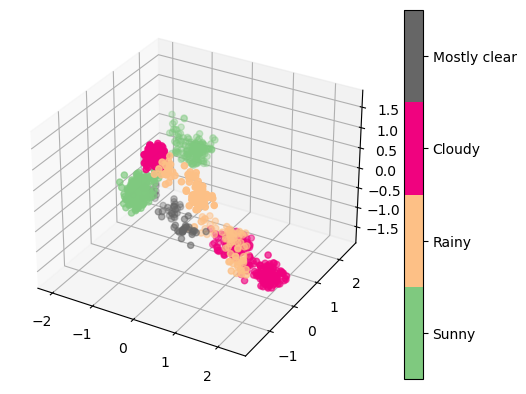

In [85]:
#let's try the plotting function
plot_input(X_train,y_train)

**TO DO (A.2):** Use a SVM classfier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel.

In [86]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [ 0.01, 0.1, 1, 10]}

#train linear SVM
#Defining a GridSearchCV object with the parameters defined above, a linear kernel and 4-fold cross validation
clf = GridSearchCV(SVC(kernel='linear'), parameters, cv=4)
#Fitting the model
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("All scores on the grid:")
print(clf.cv_results_)

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 1}
Score with best parameters:
0.91
All scores on the grid:
{'mean_fit_time': array([0.00524038, 0.00309259, 0.00298399, 0.00512403]), 'std_fit_time': array([3.12444040e-04, 7.72090463e-05, 1.70672933e-04, 2.34428175e-04]), 'mean_score_time': array([0.00185555, 0.00129259, 0.00097924, 0.00087976]), 'std_score_time': array([5.55078635e-05, 6.56282598e-05, 3.16762098e-05, 4.68973042e-05]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}], 'split0_test_score': array([0.76 , 0.868, 0.896, 0.9  ]), 'split1_test_score': array([0.776, 0.888, 0.904, 0.9  ]), 'split2_test_score': array([0.772, 0.868, 0.924, 0.924]), 'split3_test_score': array([0.772, 0.848, 0.916, 0.912]), 'mean_test_score': array([0.77 , 0.868, 0.91 , 0.909]), 'std_test_score': array([0.006     , 0.01414214, 0.010770

**TO DO (A.3):** Pick a model for the Polynomial kernel with degree=2.

In [87]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1.]}

#run SVM with poly of degree 2 kernel

#Defining a GridSearchCV object with the parameters defined above, a poly kernel of degree 2 and 4-fold cross validation as said in A.2
clf = GridSearchCV(SVC(kernel='poly', degree=2), parameters, cv=4)
#Fitting the model
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_)

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 1, 'gamma': 1.0}
Score with best parameters:
0.944

All scores on the grid:
{'mean_fit_time': array([0.00695503, 0.00713634, 0.00384927, 0.00678557, 0.00648075,
       0.00232846, 0.00701892, 0.00387204, 0.00196397]), 'std_fit_time': array([1.30231170e-04, 1.48165302e-04, 4.77605439e-05, 1.31437365e-05,
       2.76546925e-05, 1.47391609e-04, 1.73804528e-05, 6.86932088e-05,
       2.31202937e-04]), 'mean_score_time': array([0.00226647, 0.00223738, 0.00118232, 0.00220048, 0.0019213 ,
       0.00082225, 0.0022493 , 0.00117666, 0.00056469]), 'std_score_time': array([1.62425665e-05, 7.63589937e-05, 2.00363830e-05, 4.13773023e-05,
       2.78962473e-05, 3.09583449e-05, 4.05603805e-05, 9.26368171e-06,
       5.87038881e-05]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
       

**TO DO (A.4):** Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [88]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1, 1]}

#run SVM with poly of higher degree kernel
degree = 3

#Defining a GridSearchCV object with the parameters defined above, a poly kernel of degree 3 and 4-fold cross validation as said in A.2
clf = GridSearchCV(SVC(kernel='poly', degree=degree), parameters, cv=4)
#Fitting the model
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_)

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 1, 'gamma': 1}
Score with best parameters:
0.93

All scores on the grid:
{'mean_fit_time': array([0.00679094, 0.006908  , 0.00386268, 0.00666755, 0.00672632,
       0.00304621, 0.00660694, 0.00560474, 0.00490004]), 'std_fit_time': array([1.30388086e-04, 3.63216347e-05, 4.61862927e-05, 5.56382780e-05,
       4.88369412e-05, 1.76090027e-04, 4.85334091e-05, 3.82425928e-05,
       6.02310203e-04]), 'mean_score_time': array([0.00225073, 0.00217193, 0.00106812, 0.00217462, 0.00203347,
       0.00070655, 0.00218379, 0.00169218, 0.00059474]), 'std_score_time': array([7.00231298e-05, 1.29684969e-05, 2.74725043e-05, 3.58853624e-05,
       2.52701201e-05, 2.84371005e-05, 4.70145781e-05, 3.59942970e-05,
       1.29104266e-05]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
        

**TO DO (A.5):** Pick a model for the Radial Basis Function kernel:

In [89]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel
#Defining a GridSearchCV object with the parameters defined above, a rbf kernel and 4-fold cross validation as said in A.2
clf = GridSearchCV(SVC(kernel='rbf'), parameters, cv=4)
#Fitting the model
clf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf.best_params_)

print("Score with best parameters:")
print(clf.best_score_)

print("\nAll scores on the grid:")
print(clf.cv_results_)

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 10, 'gamma': 1}
Score with best parameters:
0.986

All scores on the grid:
{'mean_fit_time': array([0.00818598, 0.00766981, 0.00503856, 0.00352222, 0.00814706,
       0.00529563, 0.00233012, 0.00175202, 0.00535816, 0.0030992 ,
       0.00136852, 0.00153428, 0.00343978, 0.00205022, 0.00130075,
       0.00172269]), 'std_fit_time': array([1.82910758e-04, 4.35042049e-05, 5.59297096e-05, 6.97757084e-05,
       1.10038811e-04, 7.57686405e-05, 2.71438139e-05, 6.30166284e-05,
       7.24373509e-05, 7.73492853e-05, 3.43376559e-05, 7.06116330e-05,
       1.27376730e-04, 5.77766426e-05, 8.96652584e-05, 7.77276564e-05]), 'mean_score_time': array([0.00560266, 0.00533444, 0.0039596 , 0.00273901, 0.00564122,
       0.00426441, 0.00209635, 0.00120091, 0.00425833, 0.00262028,
       0.00103599, 0.00084096, 0.00291246, 0.00146294, 0.00065762,
       0.00077379]), 'std_score_time': array([1.42922977e-04, 6.43419648e-05, 1.86663439e-05, 4.83394404e-0

**TO DO (A.Q1) [Answer the following]** <br> 
What do you observe when using RBF and polynomial kernels on this dataset ?

<div class="alert alert-block alert-info">
    **ANSWER A.Q1**:<br>
First of all poly and RBF kernel have a better score than linear model and RBF has a much better score than poly (more or less 5%). Also RBF kernel takes more time to train than a poly kernel with lower degree.
    </div>

**TO DO (A.6):** Report here the best SVM kernel and parameters

In [90]:
#get training and test error for the best SVM model from CV
#Defining a SVC object with the best parameters found in the GridSearchCV
best_SVM = SVC(kernel='rbf', C=10, gamma=1)
best_SVM.fit(X_train, y_train)
# (error is 1 - svm.score)
training_error = 1 - best_SVM.score(X_train, y_train)
test_error = 1 - best_SVM.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.013000
Best SVM test error: 0.012341


**TO DO (A.7):** Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


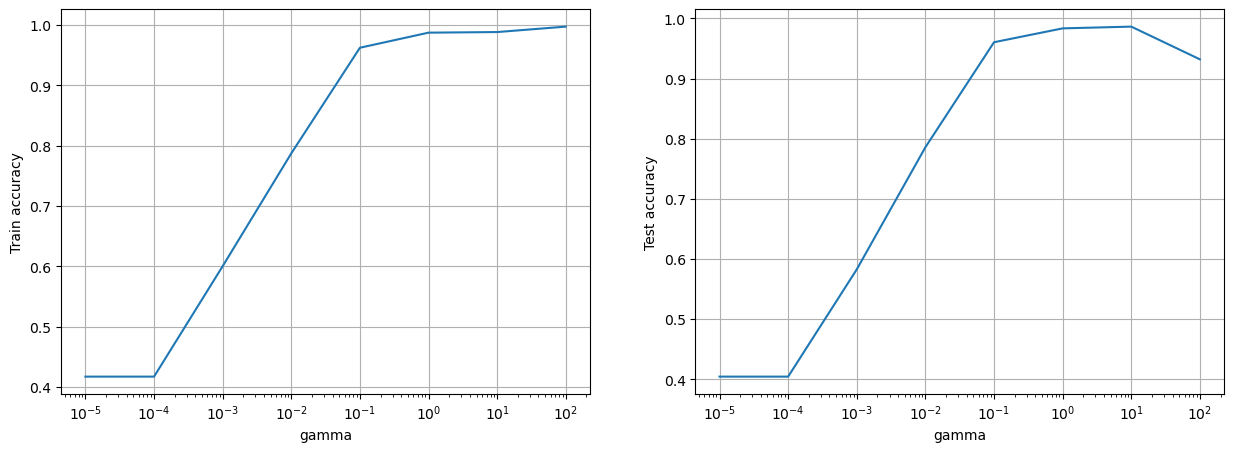

In [91]:
#Test with different values of gamma

gamma_values = np.logspace(-5,2,8)
print(gamma_values)
# use rbf kernel and C=1
train_acc_list, test_acc_list = [], []


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
#Iterate through gammas to train and test SVM with each one of them
for gamma in gamma_values:
    #Defining a SVC object with rbf kernel, C=1 and the gamma value of the iteration
    svm = SVC(kernel='rbf', C=1, gamma=gamma)
    svm.fit(X_train, y_train)
    train_acc_list.append(svm.score(X_train, y_train))
    test_acc_list.append(svm.score(X_test, y_test))


# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## B) More data
Now let's do the same but using more data points for training.

**TO DO (B.0):** Choose a higher number of data points (e.g. x = 10000) for training data depending on your computing capability.

In [92]:
X = X[permutation]
y = y[permutation]
print(y.shape)

m_training = 12500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

# initialize support variables for boundaries visualization
granularity = 25
x_max = np.abs(X).max()
x_range = np.linspace(-x_max, x_max, granularity)
x_grid = np.stack(np.meshgrid(x_range, x_range, x_range)).reshape(3, -1).T

(15099,)
Labels in training dataset:  [0. 1. 2. 3.]
Frequencies in training dataset:  [5085 2070 4571  774]


**TO DO (B.1):** Let's try to use SVM with parameters obtained from the best model for $m_{training} =  10000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO (C.Q1) cell below.

In [93]:
#get training and test error for the best SVM model from CV
#Defining a SVC object with the best parameters found in the GridSearchCV at point A.5
big_trainingset_SVM=SVC(kernel='rbf', C=10, gamma=1)
big_trainingset_SVM.fit(X_train, y_train)

# (error is 1 - svm.score)
training_error = 1 - big_trainingset_SVM.score(X_train, y_train)
test_error = 1 - big_trainingset_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.010000
Best SVM test error: 0.013851


**TO DO (B.2):** Just for comparison, let's also use logistic regression (without regularization, i.e. with C very large).

In [94]:
from sklearn import linear_model
#Define logReg object with high C value (I used my ID number) and fit the model
logreg = linear_model.LogisticRegression(C=2088235)
logreg.fit(X_train, y_train)
#Calculate the training and test error
training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.108320
Best logistic regression test error: 0.118892


**TO DO (B.3):** Try logistic regression with regularization (use C=1)

In [95]:
#Define logReg object with C =1 and fit the model
logreg = linear_model.LogisticRegression(C=2088235)
logreg.fit(X_train, y_train)
#Calculate the training and test error
training_error = 1 - logreg.score(X_train, y_train)
test_error = 1 - logreg.score(X_test, y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.108320
Best regularized logistic regression test error: 0.118892


# C) Boundaries Visualization

Now let us compare the shape of classification boundaries. 


**TO DO (C.0):** Use the SVM, logistic regression (with and without regularization) to predict on the test set X_test. 

In [98]:
rbf_SVM_test = SVC(kernel='rbf', C=10, gamma=1)
rbf_SVM_test.fit(X_train, y_train)
lr_test = linear_model.LogisticRegression(C=2088235)
lr_test.fit(X_train, y_train)
regL2_test = linear_model.LogisticRegression(C=1)
regL2_test.fit(X_train, y_train)


LogisticRegression(C=1)

We constructed a grid of all possible combinations of input values, we now use it to extract the classification boundaries of the three classifiers by having them predict on each input.

(-2.687250712642986, 2.687250712642986)

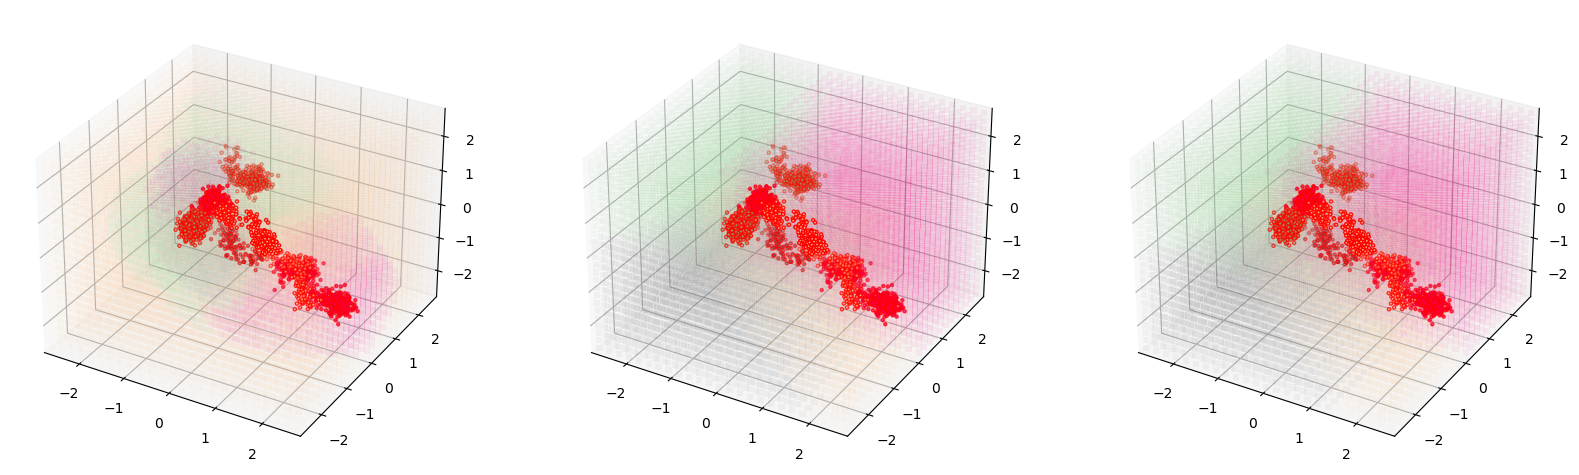

In [99]:

rbf_SVM_grid = rbf_SVM_test.predict(x_grid)
lr_grid = lr_test.predict(x_grid)
regL2_grid = regL2_test.predict(x_grid)


rbf_SVM_m = y_test == rbf_SVM_test
lr_m = y_test == lr_test
regL2_m = y_test == lr_test

fig = plt.figure(figsize=(20,36))
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax2 = fig.add_subplot(1, 3, 2, projection="3d")
ax3 = fig.add_subplot(1, 3, 3, projection="3d")

ax1.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=rbf_SVM_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax2.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=lr_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')
ax3.scatter(x_grid[:,0], x_grid[:,1], x_grid[:,2], c=regL2_grid, linewidth=0, marker="s", alpha=.05,cmap='Accent')

ax1.scatter(X_test[rbf_SVM_m,0], X_test[rbf_SVM_m,1], X_test[rbf_SVM_m,2], c=y_test[rbf_SVM_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax1.scatter(X_test[~rbf_SVM_m,0], X_test[~rbf_SVM_m,1], X_test[~rbf_SVM_m,2], c=y_test[~rbf_SVM_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax1.set_xlim([-x_max, x_max])
ax1.set_ylim([-x_max, x_max])
ax1.set_zlim([-x_max, x_max])

ax2.scatter(X_test[lr_m,0], X_test[lr_m,1], X_test[lr_m,2], c=y_test[lr_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax2.scatter(X_test[~lr_m,0], X_test[~lr_m,1], X_test[~lr_m,2], c=y_test[~lr_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax2.set_xlim([-x_max, x_max])
ax2.set_ylim([-x_max, x_max])
ax2.set_zlim([-x_max, x_max])

ax3.scatter(X_test[regL2_m,0], X_test[regL2_m,1], X_test[regL2_m,2], c=y_test[regL2_m], linewidth=.5, edgecolor="k", marker=".",cmap='Accent')
ax3.scatter(X_test[~regL2_m,0], X_test[~regL2_m,1], X_test[~regL2_m,2], c=y_test[~regL2_m], linewidth=1, edgecolor="r", marker=".",cmap='Accent')
ax3.set_xlim([-x_max, x_max])
ax3.set_ylim([-x_max, x_max])
ax3.set_zlim([-x_max, x_max])

**TO DO (C.Q1) [Answer the following]** <br> 
Compare and discuss:
- the results from SVM with m=600 and with m=10000 (or whatever value you set) training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

<div class="alert alert-block alert-info">
**ANSWER C.Q1**:<br>
answer here
    </div>

**TO DO (C.1):** Change the code below to highlight the samples classified correctly by SVM and wrongly by logistic regression.

(-2.687250712642986, 2.687250712642986)

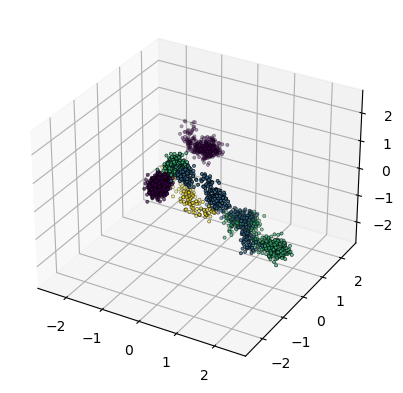

In [100]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

#Define a mask to hilight samples classified correctly by SVM and incorrectly by logistic regression !important to check again
mask = (rbf_SVM_m) & (~lr_m)

ax.scatter(X_test[mask,0], X_test[mask,1], X_test[mask,2], c=y_test[mask], linewidth=1, edgecolor="c", marker=".")
ax.scatter(X_test[~mask,0], X_test[~mask,1], X_test[~mask,2], c=y_test[~mask], linewidth=.5, edgecolor="k", marker=".")
ax.set_xlim([-x_max, x_max])
ax.set_ylim([-x_max, x_max])
ax.set_zlim([-x_max, x_max])

**TO DO (C.2):** Plot the confusion matrix for the SVM classifier and for logistic regression. The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors. You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation). You can also print also the normalized confusion matrix.


In [102]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM =  sklearn.metrics.confusion_matrix(y_test, rbf_SVM_test)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, lr_test)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [1033  458  952  156]


TypeError: Expected sequence or array-like, got <class 'sklearn.svm._classes.SVC'>

NameError: name 'confusion_SVM' is not defined

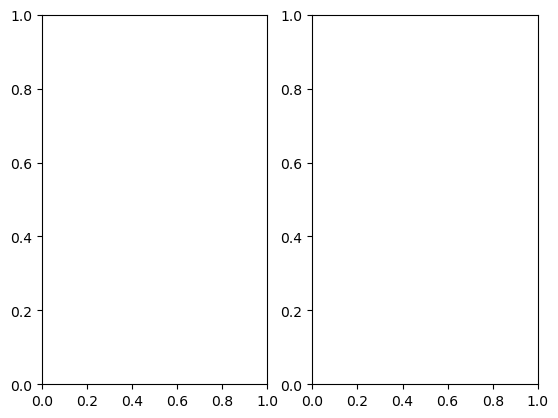

In [103]:
fig, axs = plt.subplots(1, 2)

for idx, conf in enumerate([confusion_SVM, confusion_LR]):
    
    im = axs[idx].imshow(conf /counts[:,None], cmap="Blues",interpolation='nearest')
    axs[idx].set_xticks([0,1,2,3])
    axs[idx].set_yticks([0,1,2,3])
    axs[idx].set_xticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    axs[idx].set_yticklabels(['Sunny', 'Rainy','Cloudy', 'Mostly clear'],ha="right",rotation=30) 
    cm = conf /counts[:,None]
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axs[idx].text(j, i, format(cm[i, j], fmt),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
fig.colorbar(im, ax=axs[:], location='bottom')  
plt.show()

**TO DO (C.Q2) [Answer the following]** <br> 
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


<div class="alert alert-block alert-info">
    **ANSWER C.Q2**:<br>
answer here
    </div>